In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

import train

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(batch_input_shape=(1, 9)))
model.add(keras.layers.Dense(18, activation='sigmoid'))
model.add(keras.layers.Dense(9, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [3]:
num_games = 100
outcomes = train.q_learning(model, num_games)

Game 1 of 100.
Game 11 of 100.
Game 21 of 100.
Game 31 of 100.
Game 41 of 100.
Game 51 of 100.
Game 61 of 100.
Game 71 of 100.
Game 81 of 100.
Game 91 of 100.


In [4]:
outcomes = np.array(outcomes)
local_length = 10
interval = 1
recent_percent_invalid = [np.vectorize(lambda x: int(x==-1))(outcomes[n : n+local_length]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_loss = [np.vectorize(lambda x: int(x==0))(outcomes[n : n+local_length]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_tie = [np.vectorize(lambda x: int(x==1))(outcomes[n : n+local_length]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_win = [np.vectorize(lambda x: int(x==2))(outcomes[n : n+local_length]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]

(-0.01, 1.01)

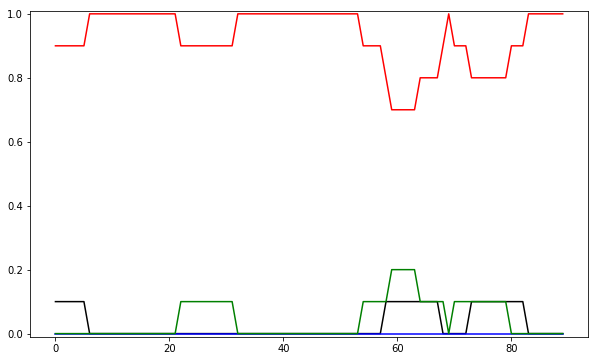

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
y_lenth = len(recent_percent_invalid)
ax.plot(list(range(y_lenth)), recent_percent_invalid, 'r')
ax.plot(list(range(y_lenth)), recent_percent_loss, 'k')
ax.plot(list(range(y_lenth)), recent_percent_tie, 'b')
ax.plot(list(range(y_lenth)), recent_percent_win, 'g')
ax.set_ylim(-0.01, 1.01)

In [6]:
training_metadata = {'y': 0.95,
                     'eps': 0.5,
                     'decay_factor': 0.999,
                     'rewards': (0, 0.25, 0.5, 2),
                     'outcomes': outcomes,
                     'state_values': (1, 0, -1)}

In [11]:
model_directory = 'model_v1'
model.save(model_directory)

INFO:tensorflow:Assets written to: model_v1\assets


In [12]:
m = keras.models.load_model(model_directory)

In [13]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 18)                   180       
_________________________________________________________________
dense_1 (Dense)              (1, 9)                    171       
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
